throughout the process of model training, data preprocessing is one of the most important steps that could heavily affect the performance of machine learning models. data preprocessing methods include but not limited to removing or replacing the NaN or NULL value, class label integer encoding, and feature scaling.

removing or replacing NaN or NULL values in the dataset.

In [1]:
import pandas as pd
from io import StringIO
csv_data = \
'''
A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
9.0,10.0,11.0,
'''
nan_df = pd.read_csv(StringIO(csv_data)) # StringIO enables to change string to csv format
nan_df.head()

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,9.0,10.0,11.0,NaN


`DataFrame.isna().sum()` counts the total number of NaN values contained in each column.

In [2]:
nan_df.isna().sum()

A    0
B    0
C    1
D    1
dtype: int64

`DataFrame.dropna()` removes all rows or columns that include 1 or more NaN value based on the parameter `axis`. `axis=0` means rows, and `axis=1` indicates columns.

In [3]:
drop_row = nan_df.dropna(axis=0)
drop_row

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [4]:
drop_col = nan_df.dropna(axis=1)
drop_col

,A,B
0,1.0,2.0
1,5.0,6.0
2,9.0,10.0


deleting too many rows or columns (which are **features** and **samples**) is not a preferable way, since it may cause the dataset to become less informative. instead, the interpolation method can take into account by assigning the new value based on the strategy (e.g. mean, median or most frequent) in `sklearn.impute.SimpleImputer()`.

In [5]:
import numpy as np
from sklearn.impute import SimpleImputer
imr = SimpleImputer(missing_values=np.nan, strategy="mean")
imr = imr.fit(nan_df.to_numpy())
imputed_data = imr.transform(nan_df.to_numpy())
imputed_data

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.],
       [ 9., 10., 11.,  6.]])

interpolation method can also be done by using `Dataframe.fillna()` with `Dataframe.mean()` as well.

In [6]:
nan_df.fillna(nan_df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0
2,9.0,10.0,11.0,6.0


for categorical data, integer encoding method is required to replace categorical features and labels to numerical values.

In [7]:
cate_df = pd.DataFrame([
    ['green', 'M', 10.1, 'class_1'],
    ['red', 'L', 13.5, 'class_2'],
    ['blue', 'XL', 15.3, 'class_1'],
    ['gray', 'S', 8.9, 'class_2']
])
cate_df.columns = ['color', 'size', 'price', 'label']
cate_df

,color,size,price,label
0,green,M,10.1,class_1
1,red,L,13.5,class_2
2,blue,XL,15.3,class_1
3,gray,S,8.9,class_2


it is always a good practice to have integer-encoded features and class labels. both feature and class label encoding using a mapping function (here, simply use python dictionary structure).

In [8]:
size_mapping = {'XL': 4, 'L': 3, 'M': 2, 'S': 1}
cate_df['size'] = cate_df['size'].map(size_mapping)
cate_df

,color,size,price,label
0,green,2,10.1,class_1
1,red,3,13.5,class_2
2,blue,4,15.3,class_1
3,gray,1,8.9,class_2


In [9]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(cate_df['label']))}
cate_df['label'] = cate_df['label'].map(class_mapping)
cate_df

,color,size,price,label
0,green,2,10.1,0
1,red,3,13.5,1
2,blue,4,15.3,0
3,gray,1,8.9,1


in addition, you can simply use `sklearn.preprocessing.LabelEncoder` to encode the class labels to integers.

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cate_df['label'] = le.fit_transform(cate_df['label'])
cate_df

,color,size,price,label
0,green,2,10.1,0
1,red,3,13.5,1
2,blue,4,15.3,0
3,gray,1,8.9,1


if there are features without the sequential order like *color*, you can do one-hot encoding using `pandas.get_dummies()` or `sklearn.preprocessing.OneHotEncoder`.

In [11]:
# if parameter drop_first is True, it will drop the first one-hot encoding column as shown below
pd.get_dummies(cate_df, drop_first=True)

,size,price,label,color_gray,color_green,color_red
0,2,10.1,0,False,True,False
1,3,13.5,1,False,False,True
2,4,15.3,0,False,False,False
3,1,8.9,1,True,False,False


load the wine dataset from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data).

In [12]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['class label', 'alcohol', 'malic acid', 'ash', 'alcalinity of ash', 'magnesium', 'total phenols',
                  'flavanoids', 'nonflavanoid phenols', 'proanthocyanins', 'color intensity', 'hue',
                   '0D280/0D315 of diluted wines', 'proline']
df_wine.head()

,class label,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,0D280/0D315 of diluted wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


always remind to split the dataset into two separate parts, the training and testing dataset.

In [13]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].to_numpy(), df_wine.iloc[:, 0].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

scaling the numerical features is important for optimizing model performance. normalization and standardization methods are two most well-known and easiest practices to try using scikit-learn API.

In [14]:
arr = np.array([0, 1, 2, 3, 4, 5])
normalization = (arr - arr.min()) / (arr.max() - arr.min())
standardization = (arr - arr.mean()) / arr.std()
input_df = pd.DataFrame(
    np.hstack((arr[:, np.newaxis], normalization[:, np.newaxis], standardization[:, np.newaxis])),
    columns=['input', 'normalization', 'standardization']
)
input_df

,input,normalization,standardization
0,0.0,0.0,-1.46385
1,1.0,0.2,-0.87831
2,2.0,0.4,-0.29277
3,3.0,0.6,0.29277
4,4.0,0.8,0.87831
5,5.0,1.0,1.46385


for normalization, `sklearn.preprocessing.MinMaxScaler`.

In [15]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_mms = mms.fit_transform(X_train)
X_test_mms = mms.transform(X_test)

for standardization, `sklearn.preprocessing.StandardScaler`.

In [16]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

in order to prevent overfitting, one might think to use **L1 regularization** to add L1 penalty and make coefficients of the model become zero (which is known as a **sparse model**).

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="liblinear", penalty="l1", C=1.0, random_state=1)
lr.fit(X_train_ss, y_train)
print("test accuracy:", lr.score(X_test_ss, y_test))

test accuracy: 1.0


In [18]:
lr.intercept_

array([-1.26392152, -1.21596534, -2.37040177])

In [19]:
lr.coef_

array([[ 1.24567209,  0.18072301,  0.74682115, -1.16438451,  0.        ,
         0.        ,  1.1595535 ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55864751,  2.50891241],
       [-1.53644846, -0.38769843, -0.99485417,  0.36489012, -0.05989298,
         0.        ,  0.66853184,  0.        ,  0.        , -1.93460212,
         1.23246414,  0.        , -2.23212696],
       [ 0.1355558 ,  0.16880291,  0.35718019,  0.        ,  0.        ,
         0.        , -2.43768478,  0.        ,  0.        ,  1.5635432 ,
        -0.81834553, -0.4930494 ,  0.        ]])

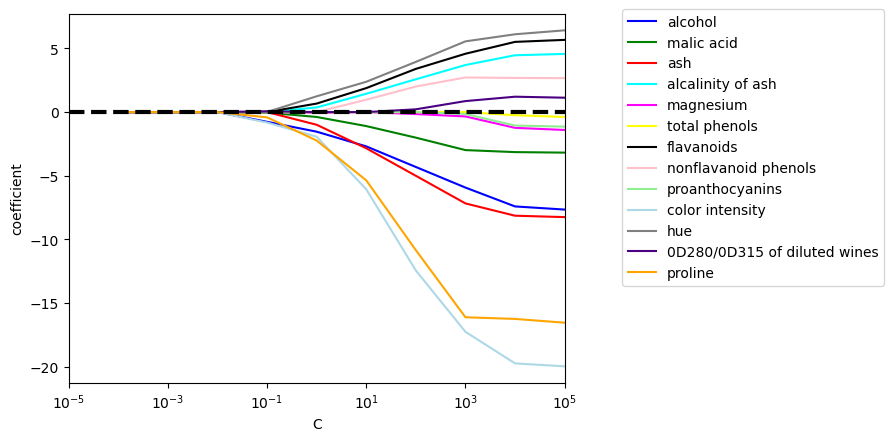

In [20]:
import matplotlib.pyplot as plt
colors = ["blue", "green", "red", "cyan",
          "magenta", "yellow", "black", "pink",
          "lightgreen", "lightblue", "gray", "indigo", "orange"]
weights, params = [], []
fig, ax = plt.subplots()
for C in np.arange(-4.0, 6.0):
    lr = LogisticRegression(solver="liblinear", penalty="l1", C=10**C, random_state=123)
    lr.fit(X_train_ss, y_train)
    weights.append(lr.coef_[1])
    params.append(10**C)
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], label=df_wine.columns[column+1], color=color)
plt.axhline(0, color="black", linestyle="--", linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.xlabel("C")
plt.ylabel("coefficient")
plt.xscale("log")
plt.legend(loc="upper left")
ax.legend(loc="upper center", bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()

**feature selection** is a method to prevent the overfitting and reduce the complexity of the model. sequential feature selection is a greedy search algorithm that finds subsets of the most important features among all to remove noises that are inherant inside the dataset and increase training efficiency. as a result, the algorithm transforms the dataset from initial $d$-dimensional space to smaller $k$-dimensional space where $k < d$.

In [21]:
from itertools import combinations
from sklearn.base import clone
from sklearn.metrics import accuracy_score

class SequentialBackwardSelection():
    def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.scoring = scoring
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]
        while dim > self.k_features:
            scores, subsets = [], []
            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p) 
            best = np.argmax(scores)
            self.scores_.append(scores[best])
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
        return self
        
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score
    
    def transform(self, X):
        return X[:, self.indices_]

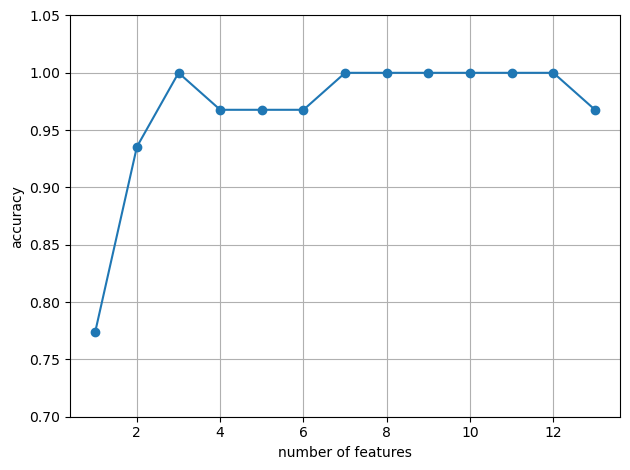

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SequentialBackwardSelection(estimator=knn, k_features=1)
sbs.fit(X_train_ss, y_train)
num_features = [len(k) for k in sbs.subsets_[::-1]]
plt.plot(num_features, sbs.scores_[::-1], marker="o")
plt.ylim([0.7, 1.05])
plt.xlabel("number of features")
plt.ylabel("accuracy")
plt.grid()
plt.tight_layout()
plt.show()

In [23]:
k3 = list(sbs.subsets_[10]) # use 3 features
print(df_wine.columns[1:][k3])

Index(['alcohol', 'malic acid', '0D280/0D315 of diluted wines'], dtype='object')


evaluate classifier using all features.

In [24]:
knn.fit(X_train_ss, y_train)
print('train accuracy: {:.4f}'.format(knn.score(X_train_ss, y_train)))
print('test accuracy: {:.4f}'.format(knn.score(X_test_ss, y_test)))

train accuracy: 0.9677
test accuracy: 0.9630


evaluate classifier using only 3 features that are selected using SBS algorithm. the test accuarcy is slightly decreased, but indicates that those features contain the most important information in the dataset.

In [25]:
knn.fit(X_train_ss[:, k3], y_train)
print('train accuracy: {:.4f}'.format(knn.score(X_train_ss[:, k3], y_train)))
print('test accuracy: {:.4f}'.format(knn.score(X_test_ss[:, k3], y_test)))

train accuracy: 0.9516
test accuracy: 0.9259


use `sklearn.feature_selection.SequentialFeatureSelector` class to perform the sequential forward selection algorithm.

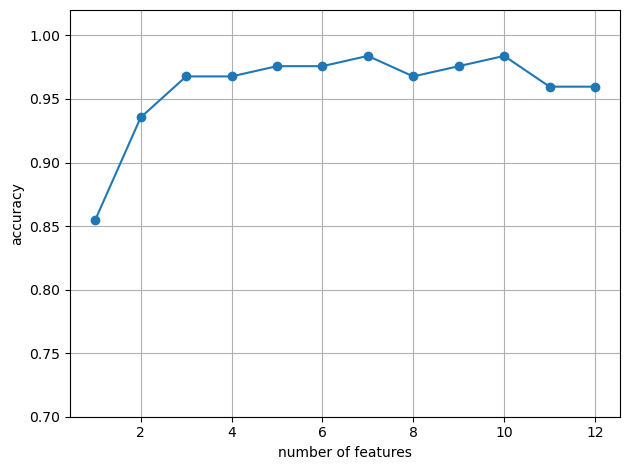

In [26]:
from sklearn.feature_selection import SequentialFeatureSelector
scores = []
for n_features in range(1, 13):
    sfs = SequentialFeatureSelector(knn, n_features_to_select=n_features, n_jobs=-1)
    sfs.fit(X_train_ss, y_train)
    f_mask = sfs.support_
    knn.fit(X_train_ss[:, f_mask], y_train)
    scores.append(knn.score(X_train_ss[:, f_mask], y_train))
plt.plot(range(1, 13), scores, marker="o")
plt.ylim([0.7, 1.02])
plt.xlabel("number of features")
plt.ylabel("accuracy")
plt.grid()
plt.tight_layout()
plt.show()

In [29]:
sfs = SequentialFeatureSelector(knn, n_features_to_select=7, n_jobs=-1) # use 7 features
sfs.fit(X_train_ss, y_train)
f_mask = sfs.support_
df_wine.columns[1:][f_mask]

Index(['alcohol', 'ash', 'magnesium', 'flavanoids', 'color intensity', 'hue',
       'proline'],
      dtype='object')

In [31]:
knn.fit(X_train_ss[:, f_mask], y_train)
print('train accuracy: {:.4f}'.format(knn.score(X_train_ss[:, f_mask], y_train)))
print('test accuracy: {:.4f}'.format(knn.score(X_test_ss[:, f_mask], y_test)))

train accuracy: 0.9839
test accuracy: 0.9815


random forest, an ensemble algorithm, is another useful feature selection method to choose features with high importance.

In [32]:
from sklearn.ensemble import RandomForestClassifier
features_cols = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train) # use original dataset instead of scaled dataset
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for i in range(X_train.shape[1]):
    print(f"{i+1: >2}) {features_cols[indices[i]]: <30} {importances[indices[i]]}")

 1) proline                        0.18545260453273973
 2) flavanoids                     0.17475097557788732
 3) color intensity                0.14391990337231414
 4) 0D280/0D315 of diluted wines   0.1361619442214559
 5) alcohol                        0.11852941731789315
 6) hue                            0.05873899628096849
 7) total phenols                  0.05087242613744542
 8) magnesium                      0.03135708460816904
 9) malic acid                     0.025648355564265708
10) proanthocyanins                0.02556987901932914
11) alcalinity of ash              0.0223659419376885
12) nonflavanoid phenols           0.013353928195970421
13) ash                            0.013278543233872913


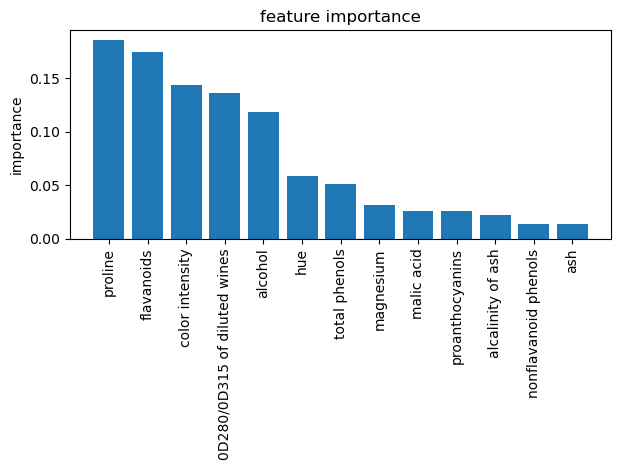

In [33]:
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.title("feature importance")
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.ylabel("importance")
plt.tight_layout()
plt.show()